In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## load alpha correlations, short data
alphas = pd.read_csv('inputs/alphas_corr.csv.gz', compression = 'gzip')
short = pd.read_csv('inputs/short_data.csv')

In [3]:
## create DFs with mean short interest for firm 1 and short interest for firm 2
short_avg = short.groupby('ticker')['short_int'].mean().to_frame()
short_a = short_avg.reset_index().rename(columns={'ticker':'Firm 1'})
short_b = short_avg.reset_index().rename(columns={'ticker':'Firm 2'})

In [4]:
# merge multiple DFs together
short_int_firm1 = pd.merge(alphas, short_a, on='Firm 1', how='left', validate = 'many_to_one')
short_int_both = pd.merge(short_int_firm1, short_b, on='Firm 2', how='left', validate = 'many_to_one')

In [5]:
## reformat final dataset
corr_and_shorts = short_int_both.rename(columns = {'short_int_x':'Firm 1 Short Int.','short_int_y':'Firm 2 Short Int.'})
corr_and_shorts['Int Level > 0.50'] = corr_and_shorts['Firm 1 Short Int.'].ge(0.50) & corr_and_shorts['Firm 2 Short Int.'].ge(0.50)

table_head = corr_and_shorts.head(10)
# table_head.to_csv('report_graphs_tables/Final_Table_Head.csv')

corr_and_shorts

,Firm 1,Firm 2,Pre-Rally Alpha Corr.,Rally Alpha Corr.,Firm 1 Short Int.,Firm 2 Short Int.,Int Level > 0.50
0,AA,AAIC,-0.148,-0.155,0.398262,0.549789,False
1,AA,AAN,-0.102,0.091,0.398262,0.324937,False
2,AA,AAOI,0.010,0.032,0.398262,0.439304,False
3,AA,AAON,-0.207,-0.431,0.398262,0.631556,False
4,AA,AAT,-0.049,0.113,0.398262,0.501212,False
...,...,...,...,...,...,...,...
2027048,ZNTL,ZUO,0.403,0.026,0.468637,0.360997,False
2027049,ZNTL,ZYXI,0.315,0.075,0.468637,0.486730,False
2027050,ZUMZ,ZUO,0.211,0.015,0.435923,0.360997,False
2027051,ZUMZ,ZYXI,0.065,-0.120,0.435923,0.486730,False


In [6]:
## calculate difference in difference between:
## high short/pre-rally, high short/rally, low short/pre-rally, low short-rally
treated = corr_and_shorts.loc[corr_and_shorts['Int Level > 0.50'] == True]
treated_mean = treated['Rally Alpha Corr.'].mean() - treated['Pre-Rally Alpha Corr.'].mean()

untreated = corr_and_shorts.loc[corr_and_shorts['Int Level > 0.50'] == False]
untreated_mean = untreated['Rally Alpha Corr.'].mean() - untreated['Pre-Rally Alpha Corr.'].mean()

diff_in_diff = treated_mean - untreated_mean

print('High short interest firms pre and during rally:')
print(round(treated_mean, 4))
print('\n')
print('Low short interest firms pre and during rally:')
print(round(untreated_mean, 4))
print('\n')
print('Difference between high short interest firms pre/during rally and low short interest firms pre/during rally')
print('(i.e. Difference-in-Difference):')
print(round(diff_in_diff, 4))

High short interest firms pre and during rally:
-0.0059


Low short interest firms pre and during rally:
-0.0087


Difference between high short interest firms pre/during rally and low short interest firms pre/during rally
(i.e. Difference-in-Difference):
0.0027


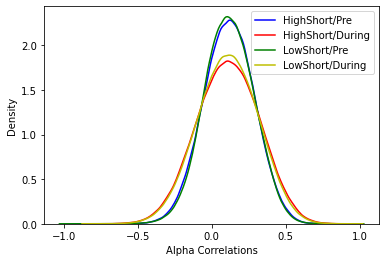

In [7]:
sns.kdeplot(treated['Pre-Rally Alpha Corr.'], label = 'HighShort/Pre', color = 'b')
sns.kdeplot(treated['Rally Alpha Corr.'],label = 'HighShort/During', color = 'r')
sns.kdeplot(untreated['Pre-Rally Alpha Corr.'],label = 'LowShort/Pre', color = 'g')
sns.kdeplot(untreated['Rally Alpha Corr.'],label = 'LowShort/During', color = 'y')

plt.xlabel('Alpha Correlations')
plt.legend()
# plt.savefig('report_graphs_tables/Alpha_Corr_Density.png')

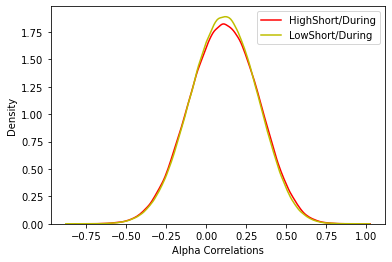

In [8]:
sns.kdeplot(treated['Rally Alpha Corr.'],label = 'HighShort/During', color = 'r')
sns.kdeplot(untreated['Rally Alpha Corr.'],label = 'LowShort/During', color = 'y')

plt.xlabel('Alpha Correlations')
plt.legend()

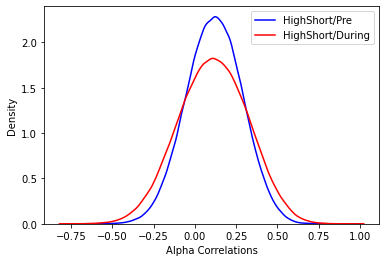

In [9]:
sns.kdeplot(treated['Pre-Rally Alpha Corr.'], label = 'HighShort/Pre', color = 'b')
sns.kdeplot(treated['Rally Alpha Corr.'],label = 'HighShort/During', color = 'r')

plt.xlabel('Alpha Correlations')
plt.legend()